In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [49]:
# Reading the dataset from the csv file
# separator is a vertical line, as seen in the dataset
data = pd.read_csv("new_dataset.csv")

# Printing the shape of the dataset
print(data.shape)


(3350, 13)


In [50]:
data.head()


frame_video  id_pedestrian  distance_to_me  distance_to_road  \
0            0              0             378                 8   
1            1              0             378                 3   
2            2              0             377                 5   
3            3              0             377                 5   
4            4              0             376                 3   

   vehicle_annotation  is_Looking  is_Crossing  distance_to_cars   xbl  ybl  \
0                   4           1            0               228  1300  702   
1                   4           1            0               235  1305  702   
2                   4           1            0               237  1303  703   
3                   4           1            0               244  1308  703   
4                   4           1            0               249  1310  703   

    xbr  label  video_name  
0  1327      1  video_0009  
1  1334      1  video_0009  
2  1336      1  video_0009  
3  1343      1  video_0009  
4  1345      1  video_0009

In [51]:
data = data.drop(["id_pedestrian","frame_video", "video_name"],axis=1)
X = data.iloc[1:,:-1]
y = data.iloc[1:,-1]
print(y)


KeyboardInterrupt: 

In [33]:
total_classes = y.nunique()
print("Number of unique species in dataset are: ",total_classes)


Number of unique species in dataset are:  3


In [34]:
distribution = y.value_counts()
print(distribution)


3    1545
2    1218
1     586
Name: label, dtype: int64


In [35]:
X_train,X_val,Y_train,Y_val = train_test_split(X,y,test_size=0.20,random_state=28)

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Creating adaboost classifier model
adb = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')
adb_model = adb.fit(X_train,Y_train)


In [37]:
print("The accuracy of the model on validation set is", adb_model.score(X_val,Y_val))


The accuracy of the model on validation set is 0.8238805970149253


In [38]:
print("The accuracy of the model on validation set is", adb_model.score(X_train,Y_train))


The accuracy of the model on validation set is 0.8077640910787607


AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

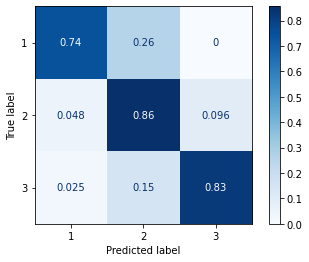

In [39]:
from sklearn.metrics import plot_confusion_matrix

plt = plot_confusion_matrix(adb_model, X_val, Y_val, normalize='true', cmap='Blues')
plt.show()

Precision: 0.8181556268829911
Recall: 0.808084656084656
0.8130889577608881


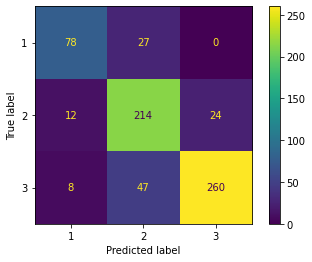

In [47]:
import numpy as np
def Average(lst):
    return sum(lst) / len(lst)
cm = plot_confusion_matrix(adb_model, X_val, Y_val)
cm = cm.confusion_matrix
from operator import truediv
import numpy as np

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(Average(prec), Average(rec)))
print( (2*Average(prec)*Average(rec))/(Average(prec)+Average(rec)))

In [ ]:
import pickle
s = pickle.dumps(adb_model)
with open('DT_adb.pkl', 'wb') as fid:
    pickle.dump(adb_model, fid)